In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## First example

Linear binary classification

In [ ]:
data_raw = load_breast_cancer()

In [ ]:
data_raw.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
data_raw.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
X = data_raw.data
y = data_raw.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
rows, cols = X_train.shape

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(cols,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fit_object = model.fit(
    x=X_train, y=y_train,
    validation_data=(X_test, y_test),
    epochs=20
)

Epoch 1/20
13/13 [==============================] - 1s 21ms/step - loss: 0.5623 - accuracy: 0.7240 - val_loss: 0.4631 - val_accuracy: 0.8363
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 0.4869 - accuracy: 0.8159 - val_loss: 0.4182 - val_accuracy: 0.8655
Epoch 3/20
13/13 [==============================] - 0s 5ms/step - loss: 0.4179 - accuracy: 0.8754 - val_loss: 0.3815 - val_accuracy: 0.8830
Epoch 4/20
13/13 [==============================] - 0s 5ms/step - loss: 0.4112 - accuracy: 0.8700 - val_loss: 0.3515 - val_accuracy: 0.8830
Epoch 5/20
13/13 [==============================] - 0s 5ms/step - loss: 0.3681 - accuracy: 0.9007 - val_loss: 0.3261 - val_accuracy: 0.9006
Epoch 6/20
13/13 [==============================] - 0s 5ms/step - loss: 0.3441 - accuracy: 0.9097 - val_loss: 0.3048 - val_accuracy: 0.9006
Epoch 7/20
13/13 [==============================] - 0s 5ms/step - loss: 0.3284 - accuracy: 0.9170 - val_loss: 0.2869 - val_accuracy: 0.9123
Epoch 8/20
13/13 [=

In [ ]:
print("Train score: ", model.evaluate(X_train, y_train))
print("Test score: ", model.evaluate(X_test, y_test))

13/13 [==============================] - 0s 1ms/step - loss: 0.1840 - accuracy: 0.9698
Train score:  [0.1839536726474762, 0.9698492288589478]
6/6 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.9591
Test score:  [0.1738175004720688, 0.9590643048286438]


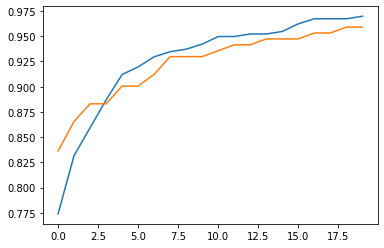

In [ ]:
plt.plot(fit_object.history['accuracy'], label='Train Acuracy')
plt.plot(fit_object.history['val_accuracy'], label='Test Acuracy')

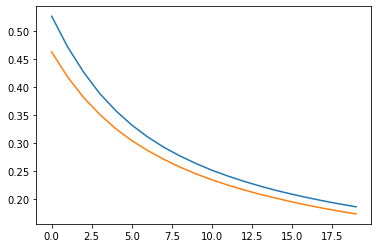

In [ ]:
plt.plot(fit_object.history['loss'], label='Train Loss')
plt.plot(fit_object.history['val_loss'], label='Test Loss')

In [ ]:
# Guardar objeto resultante del fit en variable y graficar
# r.history['loss'] y r.history['loss']

## Linear regression



In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2021-03-04 13:22:57--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-03-04 13:22:57 (40.6 MB/s) - ‘moore.csv’ saved [2302/2302]



In [19]:
data = pd.read_csv('moore.csv', names=['year','transistors'])
data.head()

,year,transistors
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [20]:
X = data.iloc[:,0].values
Y = data.iloc[:,1].values

In [21]:
X = X.reshape(-1, 1)

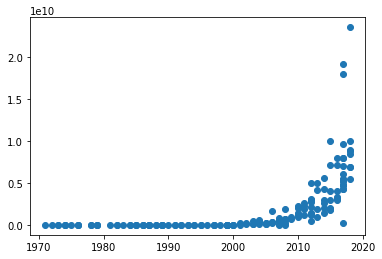

In [22]:
plt.scatter(X, Y)

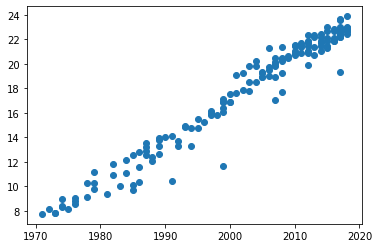

In [23]:
plt.scatter(X, np.log(Y))

In [24]:
# Centering X around its mean to have smaller values
X = X - X.mean()

# Taking the log of Y to convert into a linear problem
Y = np.log(Y)

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation=None, input_shape=(1,))
])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    loss=tf.keras.losses.mean_squared_error
)

In [29]:
# Schedule learning rate
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [30]:
fit_object = model.fit(
    X, Y,
    epochs=100,
    callbacks=[scheduler]
)

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 417.1637
Epoch 2/100
6/6 [==============================] - 0s 1ms/step - loss: 527.5372
Epoch 3/100
6/6 [==============================] - 0s 1ms/step - loss: 379.0690
Epoch 4/100
6/6 [==============================] - 0s 1ms/step - loss: 238.0073
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 192.6324
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 193.0052
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 127.4075
Epoch 8/100
6/6 [==============================] - 0s 1ms/step - loss: 123.4282
Epoch 9/100
6/6 [==============================] - 0s 1ms/step - loss: 123.1270
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 59.4934
Epoch 11/100
6/6 [==============================] - 0s 1ms/step - loss: 42.0483
Epoch 12/100
6/6 [==============================] - 0s 1ms/step - loss: 27.5201
Epoch 13/100
6/6 [======================

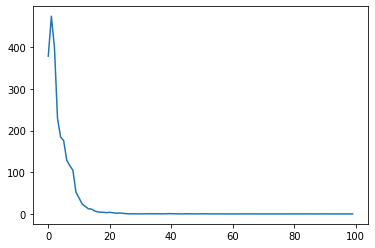

In [31]:
plt.plot(fit_object.history['loss'], label='Loss')

In [ ]:

# Get the weights
model.layers[0].get_weights